In [22]:
pip install elapid # Install the elapid library using pip [Series of Species Distribution Modeling Tools for python which includes Implementation of Maxent Model with biogeography data]

In [23]:
pip install geopandas # Install the geopandas library using pip [We can use it to work with geospatial data]

In [24]:
pip install rasterio # Install the rasterio library using pip [We can use it to read and manipulate raster datasets]

In [25]:
import matplotlib.pyplot as plt # For Data Visualization
import rasterio as rio # for Geospatial Raster Data
import geopandas as gpd # for Geospatial Data, specifically Vector Data
import pandas as pd  # For Data Manipulation and Analysis Tool
import elapid as ela  # Species Distribution Modeling Tools
import rasterio.plot as rioplot # To Visualize Raster Data
import warnings # To Ignore all the Warning Messages
import os # To Load the Datasets/Files from the Specified Directory
import re # For Patterns, i.e., used to match and manipulate strings
from sklearn import metrics # For Evaluation Metrics (To assess the performance)

In [26]:
# PLot Preferences
plt.style.use('ggplot')

# Ignore the Warning Messages
warnings.filterwarnings("ignore")

# Define the color for barplots
pair_colors = ['#FFCC02', '#00458C']

In [27]:
# Mount Google Drive in Google Colab

from google.colab import drive
drive.mount('/content/drive')

# After mounting Google Drive, we can access files and directories within it

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
bio_clim='/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/'

In [29]:
# background data or raster

#os path join to read background data
bioclimate_variables=[os.path.join(bio_clim,f) for f in os.listdir(bio_clim) if f.endswith(".tif")]
#bioclimate_variables

In [30]:
# Function to extract the Bioclimatic Variable Number from the path

def extract_number(path):
    # Extract the number using regular expression
    match = re.search(r'Bio_(\d+)', path)
    if match:
        return int(match.group(1))
    return 0

# Sort the paths based on the extracted number
sorted_paths = sorted(bioclimate_variables, key=extract_number)

# Print the sorted paths
for bioclimate_variables in sorted_paths:
    print(bioclimate_variables)

# Save the sorted paths in a list
bioclimate_variables = list(sorted_paths)

/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_1_Annual_mean_Temperature_Chelsa_1981-2010.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_2_Mean_Diurnal_Range_Chelsa_1981-2010.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_3_Isothermality_Chelsa_1981-2010.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_4_Temperature_Seasonality_Chelsa_1981-2010.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa_1981-2010.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_1981-2010.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_US_Crop_file_1981-2010/cropped_Bio_7_Temperature_Annual_Range_C

In [31]:
# Add the Labels for Map
# Read the file path and split them, since we need only bioclim variables names

labels = []  # Initialize labels as an empty list
for i in bioclimate_variables:
    filename = os.path.basename(i)
    filename_without_extension = os.path.splitext(filename)[0]
    labels.append(filename_without_extension)
print(labels)

['cropped_Bio_1_Annual_mean_Temperature_Chelsa_1981-2010', 'cropped_Bio_2_Mean_Diurnal_Range_Chelsa_1981-2010', 'cropped_Bio_3_Isothermality_Chelsa_1981-2010', 'cropped_Bio_4_Temperature_Seasonality_Chelsa_1981-2010', 'cropped_Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa_1981-2010', 'cropped_Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_1981-2010', 'cropped_Bio_7_Temperature_Annual_Range_Chelsa_1981-2010', 'cropped_Bio_8_Mean_Temperature_of_Wettest_Quarter_Chelsa_1981-2010', 'cropped_Bio_9_Mean_Temperature_of_Driest_Quarter_Chelsa_1981-2010', 'cropped_Bio_10_Mean_Temperature_of_Warmest_Quarter_Chelsa_1981-2010', 'cropped_Bio_11_Mean_Temperature_of_Coldest_Quarter_Chelsa_1981-2010', 'cropped_Bio_12_Annual_Precipitation_Chelsa', 'cropped_Bio_13_Precipitation_of_Wettest_Month_Chelsa_1981-2010', 'cropped_Bio_14_Precipitation_of_Driest_Month_Chelsa_1981-2010', 'cropped_Bio_15_Precipitation_of_Seasonality_Chelsa_1981-2010', 'cropped_Bio_16_Precipitation_of_Wettest_Quarter_Chelsa_198

In [32]:
# Reading Bug Data (Species Data), also called as Presence data in the Geopackage File Format

# read the presence data, draw background point samples
bug_Presence_data = gpd.read_file('/content/drive/MyDrive/Project_2/Insect Pest/Species Data/EDD Maps site/Halyomorpha_halys(1999_2023).gpkg')

In [33]:
# Convert the 'ObsDate' column to datetime format
bug_Presence_data['ObsDate'] = pd.to_datetime(bug_Presence_data['ObsDate'])

# Filter the data for the years 2011 to 2022
presence = bug_Presence_data[(bug_Presence_data['ObsDate'].dt.year >= 1999) & (bug_Presence_data['ObsDate'].dt.year <= 2010)]
presence.head()


,objectid,reporter,RecOwner,SciName,ComName,Nativity,OccStatus,Status,ObsDate,DateEnt,...,Reference,Locality,Comments,ReviewDate,Reviewer,VerifyMthd,Verified,IDCred,ReviewComm,geometry
1972,3049349,Rutgers Stink Bug Reports Rutgers,University,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2010-12-31,07-24-13,...,NaN,NaN,NaN,NaN,NaN,NaN,Verified,Unconfirmed,NaN,POINT (-86.91391 40.39347)
1973,3049350,Rutgers Stink Bug Reports Rutgers,University,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2010-12-31,07-24-13,...,NaN,NaN,NaN,NaN,NaN,NaN,Verified,Unconfirmed,NaN,POINT (-78.14250 39.30055)
1974,3049351,Rutgers Stink Bug Reports Rutgers,University,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2010-12-31,07-24-13,...,NaN,NaN,NaN,NaN,NaN,NaN,Verified,Unconfirmed,NaN,POINT (-83.08296 40.26885)
1975,3049352,Rutgers Stink Bug Reports Rutgers,University,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2010-12-31,07-24-13,...,NaN,NaN,NaN,NaN,NaN,NaN,Verified,Unconfirmed,NaN,POINT (-74.18713 40.84556)
1976,3049353,Rutgers Stink Bug Reports Rutgers,University,Halyomorpha halys,brown marmorated stink bug,Introduced,Detected,Positive,2010-12-30,07-24-13,...,NaN,NaN,NaN,NaN,NaN,NaN,Verified,Unconfirmed,NaN,POINT (-83.01361 40.01215)


# Bio_1_Annual_mean_Temperature_Chelsa_1981-2010

In [34]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[0], count=10_000)
background.head()

0    POINT (-124.94502 28.61384)
1    POINT (-100.69639 45.38129)
2     POINT (-76.85959 35.87022)
3     POINT (-68.56917 44.61413)
4    POINT (-100.37741 42.60602)
dtype: geometry

In [35]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [36]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

,geometry,class,b01,b02,b03,b04,b05,b06,b07,b08,...,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19
0,POINT (-86.91391 40.39347),1,2845,95,2,9396,3017,2666,351,2942,...,2962,2718,9862,1190,490,271,3388,1649,3172,1649
1,POINT (-78.14250 39.30055),1,2855,99,2,8546,3028,2691,337,2943,...,2965,2743,10085,1008,642,144,2945,1996,2782,1996
2,POINT (-83.08296 40.26885),1,2842,94,2,9009,3012,2670,342,2935,...,2955,2722,10179,1140,564,209,3346,1985,3052,1990
3,POINT (-74.18713 40.84556),1,2849,83,2,8762,3016,2682,334,2954,...,2961,2735,13377,1278,860,104,3676,2861,3612,2861
4,POINT (-83.01361 40.01215),1,2847,95,2,9002,3017,2675,342,2940,...,2961,2727,9978,1154,584,204,3266,1993,2915,1993


In [37]:
# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [38]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [39]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model1c.ela')

Training AUC score: 0.985


In [40]:
# Write the model predictions to disk
output_raster1 = 'Annual_mean_Temperature_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster1, quiet=True)

# and read into memory
with rio.open(output_raster1, 'r') as src:
    pred = src.read(1, masked=True)

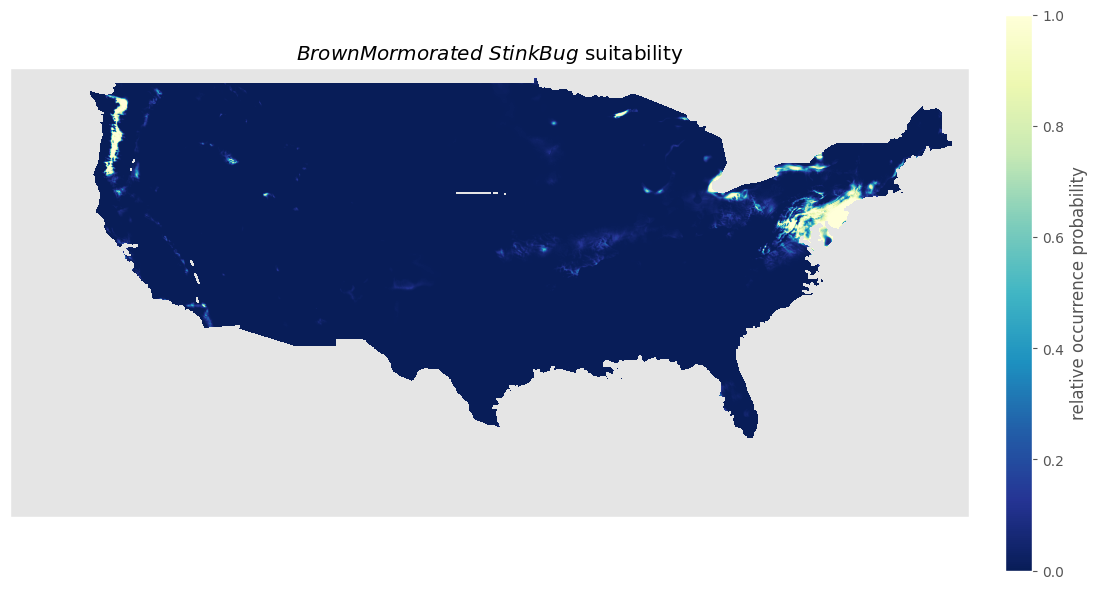

In [41]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot1 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar1 = plt.colorbar(plot1, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [42]:
# Save the colorbar as a TIFF file
colorbar_file1 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Annual_mean_Temperature_Chelsa_Prediction_1981-2010.tif'
cbar1.ax.figure.savefig(colorbar_file1, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_2_Mean_Diurnal_Range_Chelsa_1981-2010.tif

In [43]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[1], count=10_000)
background.head()

0     POINT (-94.47398 21.65824)
1     POINT (-67.62413 23.91801)
2     POINT (-71.59730 22.90522)
3     POINT (-75.48905 28.37119)
4    POINT (-124.81723 35.17195)
dtype: geometry

In [44]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [45]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [46]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [47]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.986


In [48]:
# Save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model2c.ela')

# Write the model predictions to disk
output_raster2 = 'Mean_Diurnal_Range_Chelsa_Prediction_1981-2010.tif'

ela.apply_model_to_rasters(model, bioclimate_variables, output_raster2, quiet=True)

In [49]:
# Read into memory
with rio.open(output_raster2, 'r') as src:
    pred = src.read(1, masked=True)

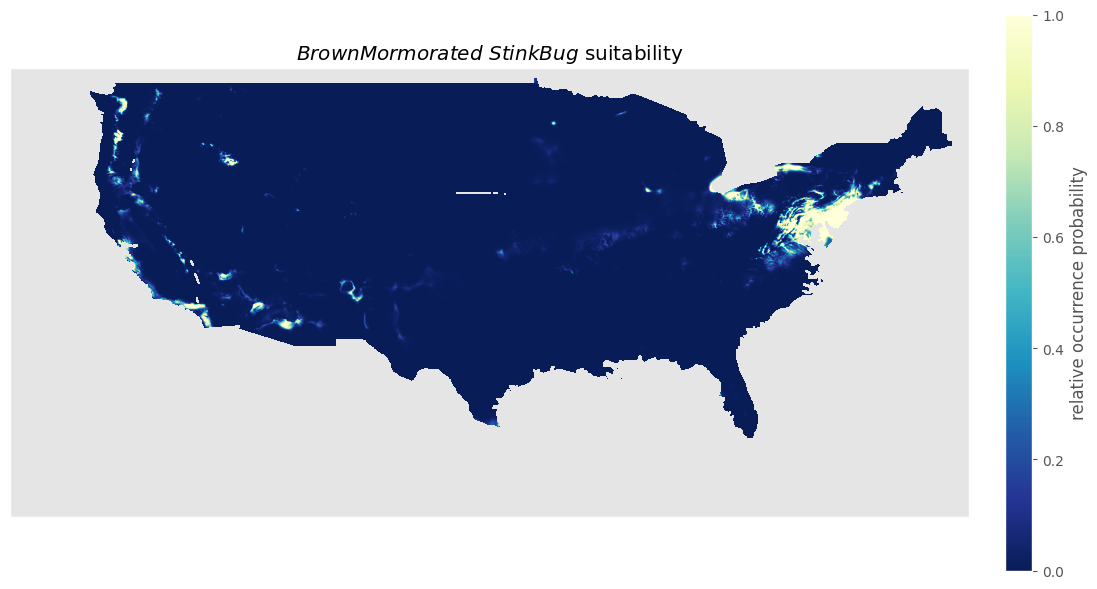

In [50]:
# Plot the Suitability Predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot2 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar2 = plt.colorbar(plot2, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [51]:
# Save the colorbar as a TIFF file
colorbar_file2 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Mean_Diurnal_Range_Chelsa_1981-2010.tif'
cbar2.ax.figure.savefig(colorbar_file2, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_3_Isothermality_Chelsa_1981-2010.tif

In [52]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[2], count=10_000)
background.head()

0     POINT (-78.72917 47.57917)
1    POINT (-101.52083 32.47917)
2     POINT (-81.25417 30.95417)
3    POINT (-127.79583 31.58750)
4     POINT (-93.17083 39.38750)
dtype: geometry

In [53]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [54]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [55]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [56]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [57]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model3c.ela')

# Write the model predictions to disk
output_raster3 = 'Isothermality_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster3, quiet=True)

In [58]:
# Read into memory
with rio.open(output_raster3, 'r') as src:
    pred = src.read(1, masked=True)

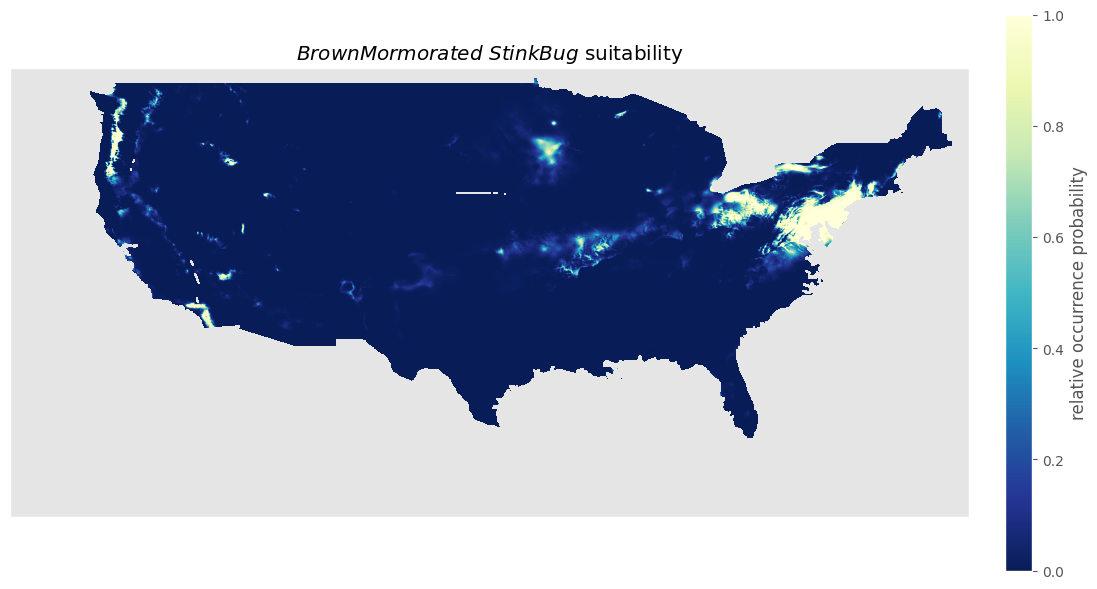

In [59]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot3 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar3 = plt.colorbar(plot3, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [60]:
# Save the colorbar as a TIFF file
colorbar_file3 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Isothermality_Chelsa_Prediction_1981-2010.tif'
cbar3.ax.figure.savefig(colorbar_file3, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_4_Temperature_Seasonality_Chelsa_1981-2010.tif

In [61]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[3], count=10_000)
background.head()

0    POINT (-124.89647 24.40022)
1     POINT (-98.56348 47.97142)
2    POINT (-115.13345 37.58779)
3     POINT (-66.01989 45.00062)
4     POINT (-92.39810 40.60167)
dtype: geometry

In [62]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [63]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [64]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [65]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [66]:
# Save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model4c.ela')

# Write the model predictions to disk
output_raster4 = 'Temperature_Seasonality_Chelsa_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster4, quiet=True)

In [67]:
# Read into memory
with rio.open(output_raster4, 'r') as src:
    pred = src.read(1, masked=True)


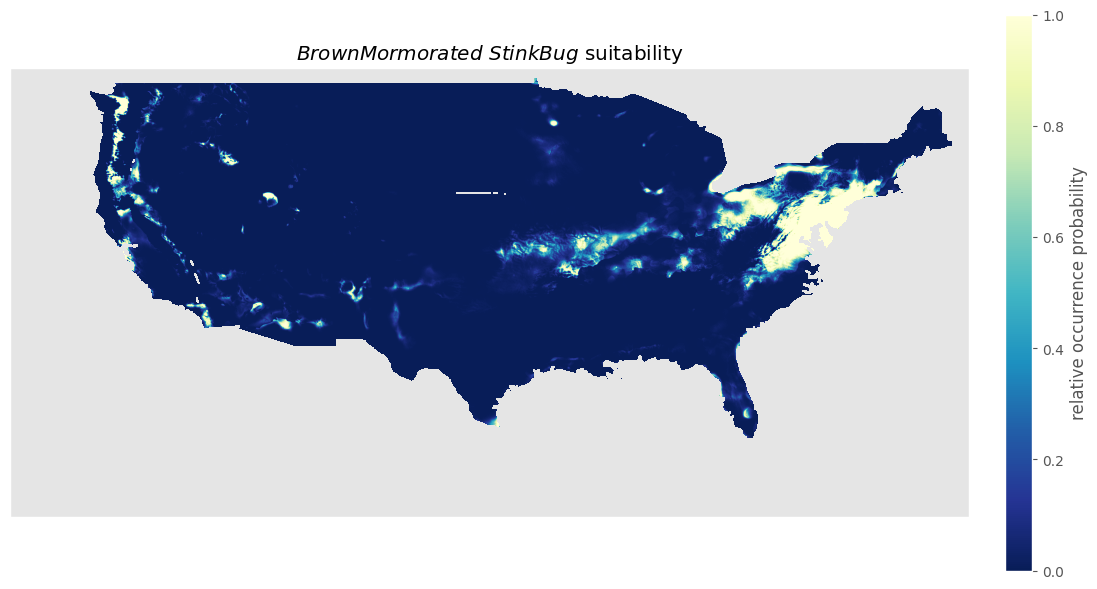

In [68]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot4 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar4 = plt.colorbar(plot4, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [69]:
# Save the colorbar as a TIFF file
colorbar_file4 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Temperature_Seasonality_Chelsa_1981-2010.tif'
cbar4.ax.figure.savefig(colorbar_file4, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa_1981-2010.tif

In [70]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[4], count=10_000)
background.head()

0    POINT (-120.38107 20.43014)
1     POINT (-97.36618 26.23848)
2     POINT (-88.32324 28.05988)
3    POINT (-120.42663 41.29720)
4     POINT (-72.57365 24.77677)
dtype: geometry

In [71]:
# Merge Datasets and Read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [72]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [73]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [74]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [75]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model5c.ela')

#Write the model predictions to disk
output_raster5 = 'Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster5, quiet=True)

In [76]:
# Read into memory
with rio.open(output_raster5, 'r') as src:
    pred = src.read(1, masked=True)


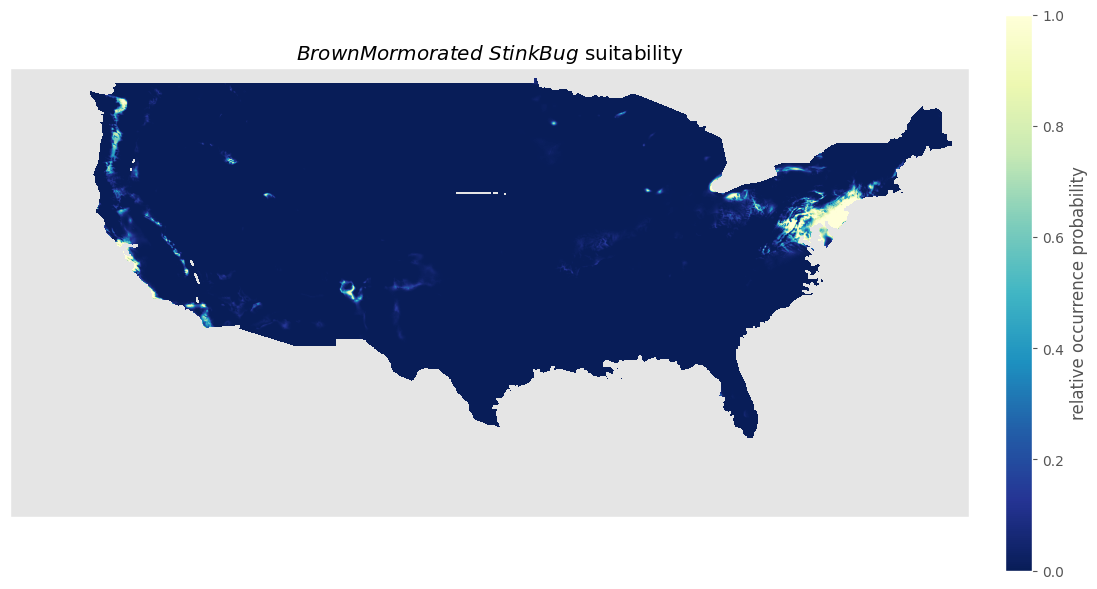

In [77]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot5 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar5 = plt.colorbar(plot5, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [78]:
# Save the colorbar as a TIFF file
colorbar_file5 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_1981-2010.tif'
cbar5.ax.figure.savefig(colorbar_file5, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_1981-2010.tif


In [79]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[5], count=10_000)
background.head()

0    POINT (-114.08999 36.58644)
1    POINT (-124.14335 28.09898)
2     POINT (-97.01314 43.56668)
3    POINT (-109.52936 43.68067)
4    POINT (-104.54275 35.43652)
dtype: geometry

In [80]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [81]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [82]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [83]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [84]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model6c.ela')

# Write the model predictions to disk
output_raster6 = 'Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster6, quiet=True)

In [85]:
# Read into memory
with rio.open(output_raster6, 'r') as src:
    pred = src.read(1, masked=True)


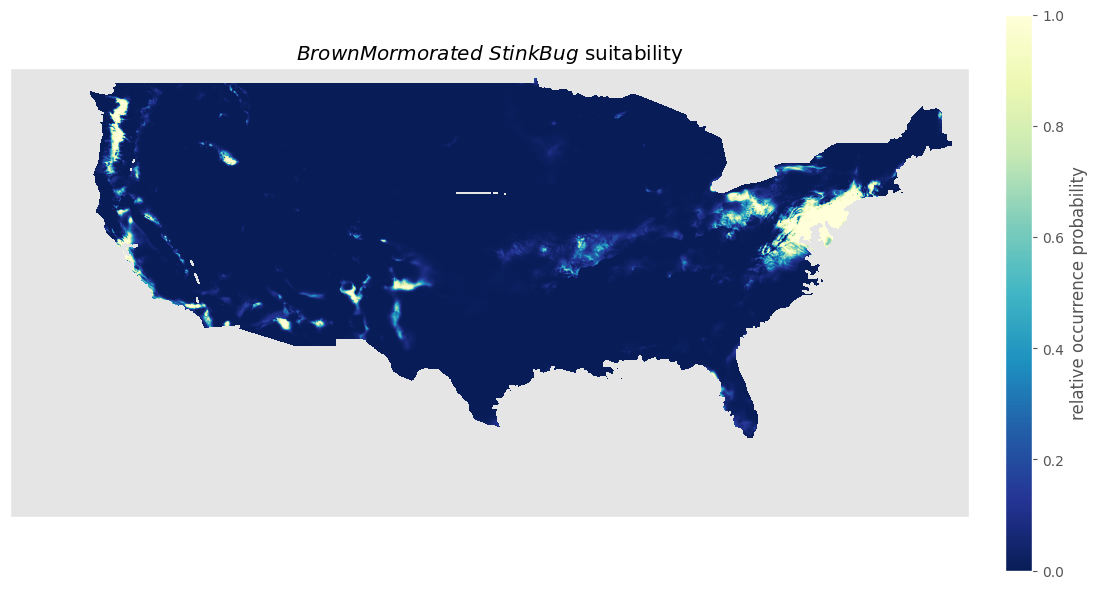

In [86]:
 # Plot the Suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot6 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar6 = plt.colorbar(plot6, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [87]:
# Save the colorbar as a TIFF file
colorbar_file6 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_1981-2010.tif'
cbar6.ax.figure.savefig(colorbar_file6, format='tiff')

# Close the figure to free up memory
plt.close(fig)

Bio_7_Temperature_Annual_Range_Chelsa_1981-2010

In [89]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[6], count=10_000)
background.head()

0     POINT (-85.14255 35.49662)
1    POINT (-129.02201 26.26881)
2     POINT (-74.08328 42.36510)
3    POINT (-116.18783 24.42735)
4     POINT (-94.96111 44.06786)
dtype: geometry

In [90]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [91]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [92]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [93]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [94]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model7c.ela')

# Write the model predictions to disk
output_raster7 = 'Temperature_Annual_Range_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster7, quiet=True)

In [95]:
# Read into memory
with rio.open(output_raster7, 'r') as src:
    pred = src.read(1, masked=True)


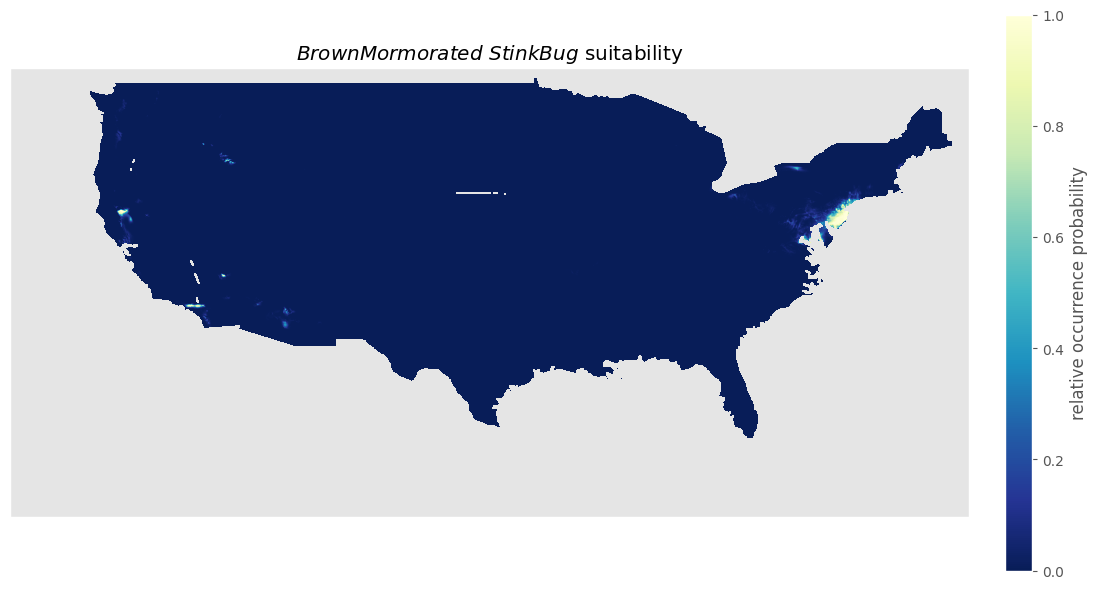

In [96]:

# Plot the Suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot7 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar7 = plt.colorbar(plot7, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [97]:
# Save the colorbar as a TIFF file
colorbar_file7 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Temperature_Annual_Range_Chelsa_Prediction_1981-2010.tif'
cbar7.ax.figure.savefig(colorbar_file7, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_8_Mean_Temperature_of_Wettest_Quarter_Chelsa_1981-2010.tif

In [98]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[7], count=10_000)
background.head()

0    POINT (-111.25417 28.19583)
1    POINT (-125.15417 20.86250)
2     POINT (-95.12083 32.37917)
3     POINT (-96.27083 35.08750)
4    POINT (-120.22917 24.05417)
dtype: geometry

In [99]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [100]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [101]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [102]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.984


In [103]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model8c.ela')

# Write the model predictions to disk
output_raster8 = 'Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster8, quiet=True)

In [104]:
# Read into memory
with rio.open(output_raster8, 'r') as src:
    pred = src.read(1, masked=True)


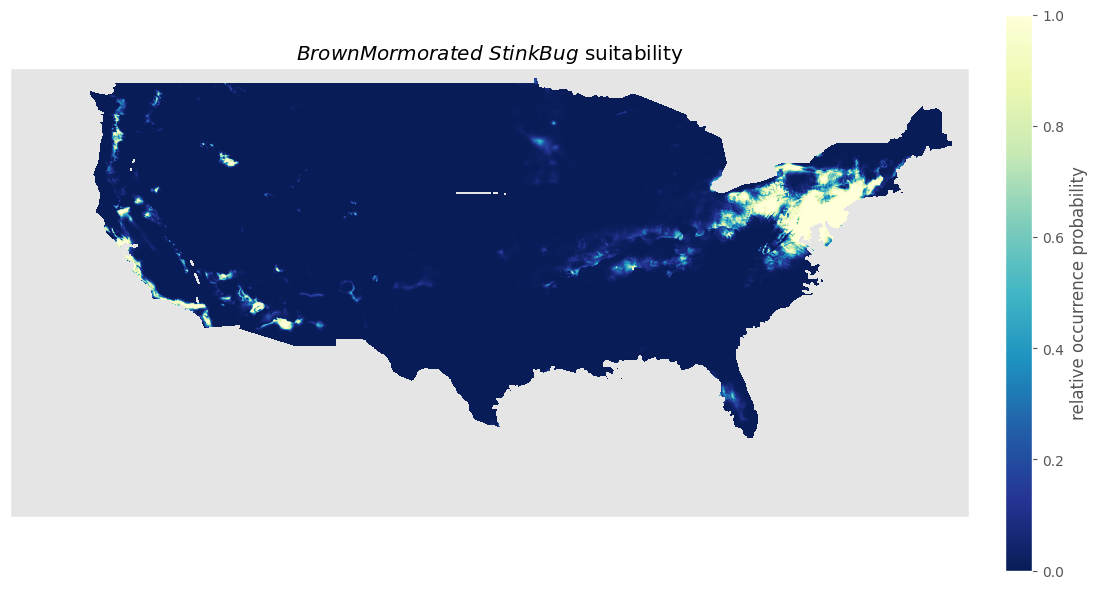

In [105]:
   # Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot8 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar8 = plt.colorbar(plot8, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [106]:
# Save the colorbar as a TIFF file
colorbar_file = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar8.ax.figure.savefig(colorbar_file, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_9_Mean_Temperature_of_Driest_Quarter_Chelsa_1981-2010.tif

In [107]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[8], count=10_000)
background.head()

0    POINT (-125.97083 27.62917)
1    POINT (-118.29583 37.20417)
2     POINT (-69.56250 32.49583)
3     POINT (-74.91250 48.37917)
4     POINT (-70.06250 27.72917)
dtype: geometry

In [108]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [109]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [110]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [111]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [112]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model9c.ela')

# Write the model predictions to disk
output_raster9 = 'Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster9, quiet=True)

# Read into memory
with rio.open(output_raster9, 'r') as src:
    pred = src.read(1, masked=True)


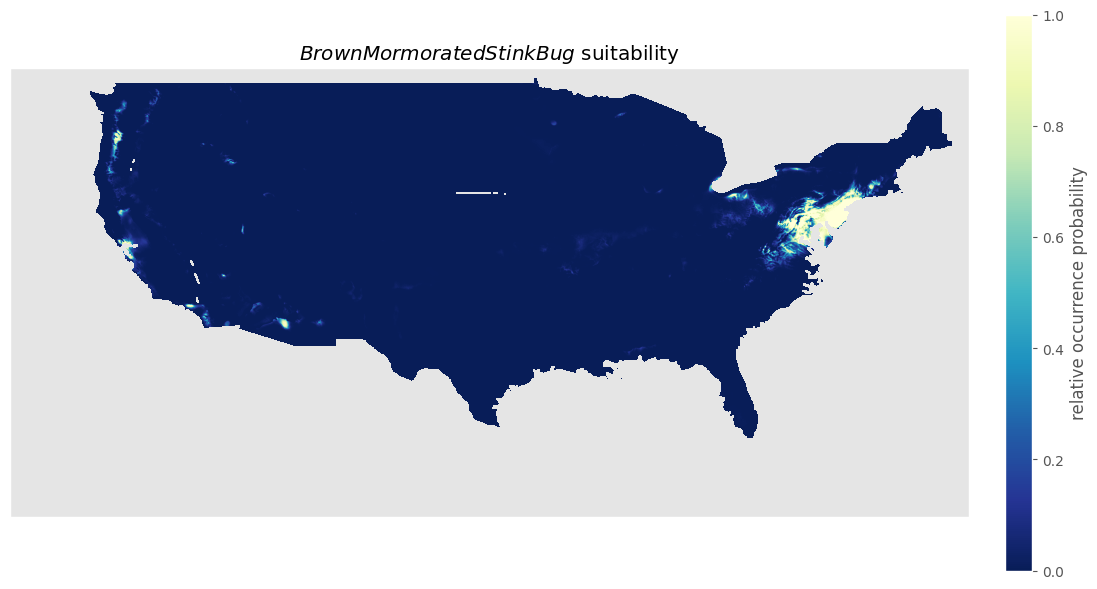

In [113]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot9 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar9 = plt.colorbar(plot9, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [114]:
# Save the colorbar as a TIFF file
colorbar_file9 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar9.ax.figure.savefig(colorbar_file9, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_10_Mean_Temperature_of_Warmest_Quarter_Chelsa_1981-2010.tif

In [115]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[9], count=10_000)
background.head()

0     POINT (-82.27917 42.15417)
1     POINT (-67.82917 49.07083)
2     POINT (-91.58750 27.63750)
3    POINT (-127.47917 46.27917)
4    POINT (-126.92083 21.72917)
dtype: geometry

In [116]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [117]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [118]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [119]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.986


In [120]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model10c.ela')

# Write the model predictions to disk
output_raster10 = 'Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster10, quiet=True)

# Read into memory
with rio.open(output_raster10, 'r') as src:
    pred = src.read(1, masked=True)


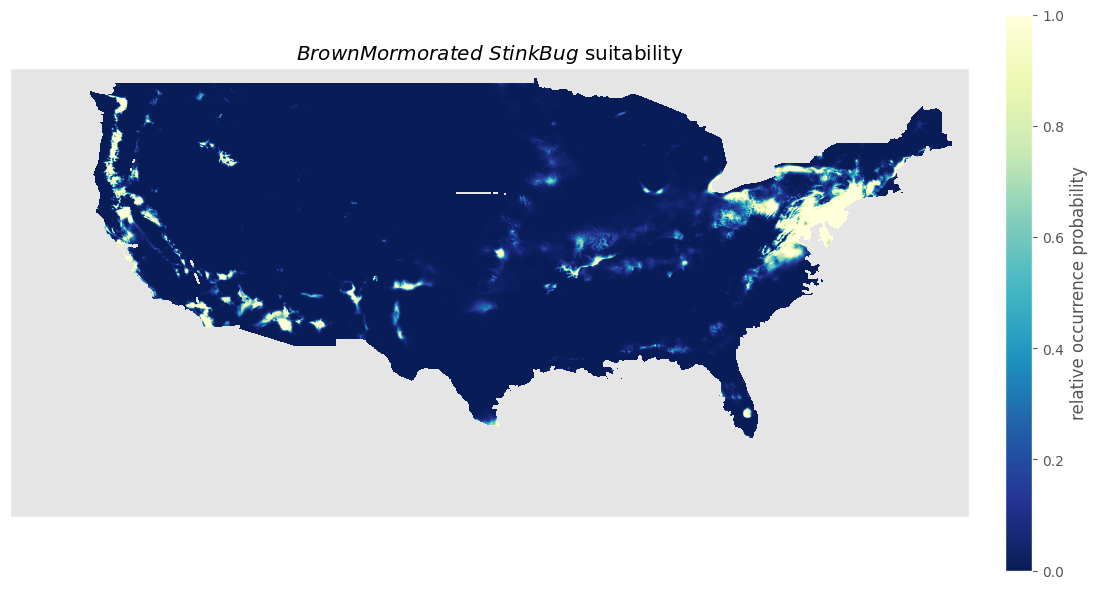

In [121]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot10 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar10 = plt.colorbar(plot10, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [122]:
# Save the colorbar as a TIFF file
colorbar_file10 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar10.ax.figure.savefig(colorbar_file10, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_11_Mean_Temperature_of_Coldest_Quarter_Chelsa_1981-2010.tif

In [123]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[10], count=10_000)
background.head()

0    POINT (-103.63750 20.33750)
1     POINT (-74.44583 25.87917)
2    POINT (-121.37917 25.10417)
3     POINT (-82.32083 31.61250)
4     POINT (-95.68750 23.41250)
dtype: geometry

In [124]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [125]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [126]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [127]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [128]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model11c.ela')

# Write the model predictions to disk
output_raster11 = 'Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster11, quiet=True)

# Read into memory
with rio.open(output_raster11, 'r') as src:
    pred = src.read(1, masked=True)

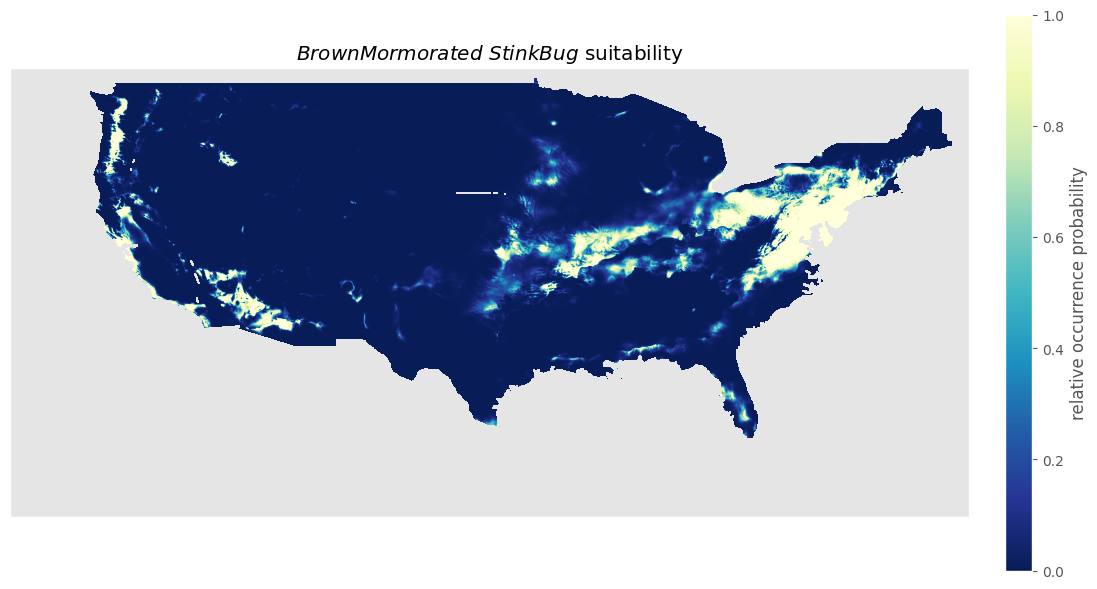

In [129]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot11 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar11 = plt.colorbar(plot11, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [130]:
# Save the colorbar as a TIFF file
colorbar_file11 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar11.ax.figure.savefig(colorbar_file11, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_12_Annual_Precipitation_Chelsa_1981-2010.tif

In [131]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[11], count=10_000)
background.head()

0    POINT (-109.50035 49.00578)
1     POINT (-66.28685 24.60115)
2     POINT (-96.12245 23.98161)
3    POINT (-121.66362 33.92680)
4    POINT (-103.59023 43.74057)
dtype: geometry

In [132]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [133]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [134]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [135]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.986


In [136]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model10c.ela')

# Write the model predictions to disk
output_raster12 = 'Annual_Precipitation_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster12, quiet=True)

# Read into memory
with rio.open(output_raster12, 'r') as src:
    pred = src.read(1, masked=True)


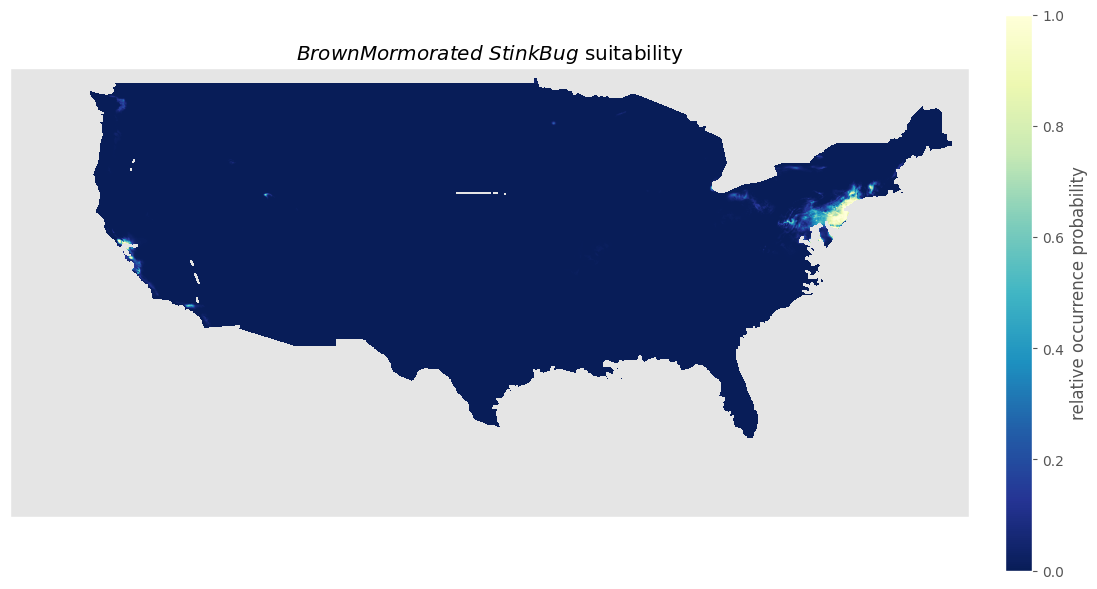

In [137]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot12 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar12 = plt.colorbar(plot12, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [138]:
# Save the colorbar as a TIFF file
colorbar_file12 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Annual_Precipitation_Chelsa_Prediction_1981-2010.tif'
cbar12.ax.figure.savefig(colorbar_file12, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_13_Precipitation_of_Wettest_Month_Chelsa_1981-2010.tif

In [139]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[12], count=10_000)
background.head()

0    POINT (-120.08269 32.05112)
1     POINT (-93.86302 38.52131)
2    POINT (-114.98961 26.69787)
3     POINT (-94.50817 23.60580)
4    POINT (-123.65255 48.20251)
dtype: geometry

In [140]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [141]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [142]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [143]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [144]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model13c.ela')

# Write the model predictions to disk
output_raster13 = 'Precipitation_of_Wettest_Month_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster13, quiet=True)

# Read into memory
with rio.open(output_raster13, 'r') as src:
    pred = src.read(1, masked=True)


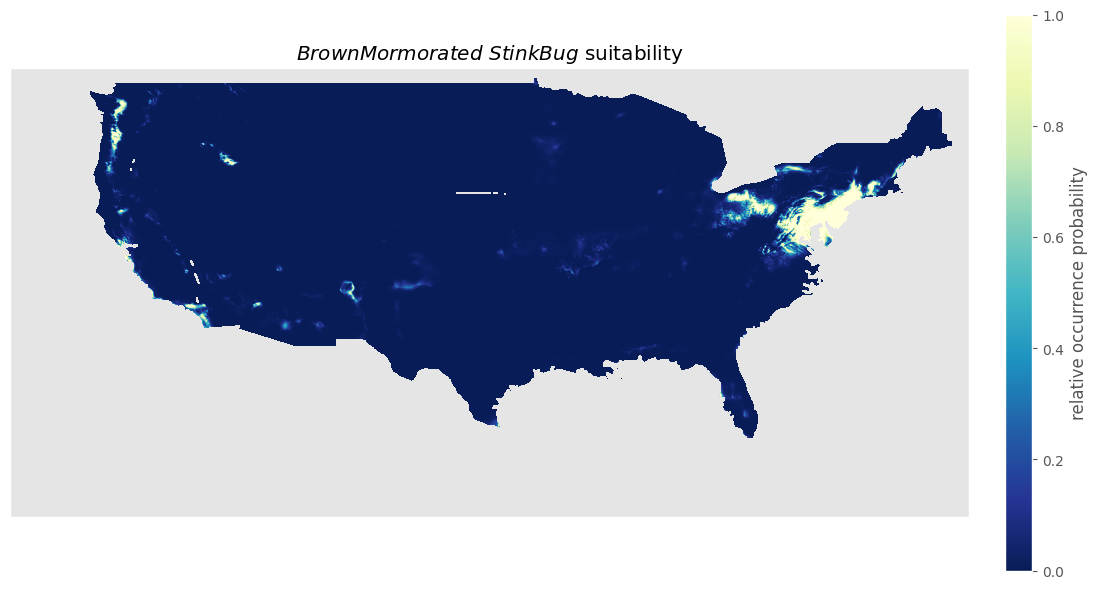

In [145]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot13 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar13 = plt.colorbar(plot13, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [146]:
# Save the colorbar as a TIFF file
colorbar_file13 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Precipitation_of_Wettest_Month_Chelsa_Prediction_1981-2010.tif'
cbar13.ax.figure.savefig(colorbar_file13, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_14_Precipitation_of_Driest_Month_Chelsa_1981-2010.tif

In [147]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[13], count=10_000)
background.head()

0    POINT (-127.72776 43.47816)
1     POINT (-90.94523 32.61815)
2     POINT (-68.57650 37.69543)
3     POINT (-99.14255 47.18573)
4    POINT (-118.87624 23.65855)
dtype: geometry

In [148]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [149]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [150]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [151]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [152]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model14c.ela')

# Write the model predictions to disk
output_raster14 = 'Precipitation_of_Driest_Month_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster14, quiet=True)

# Read into memory
with rio.open(output_raster14, 'r') as src:
    pred = src.read(1, masked=True)


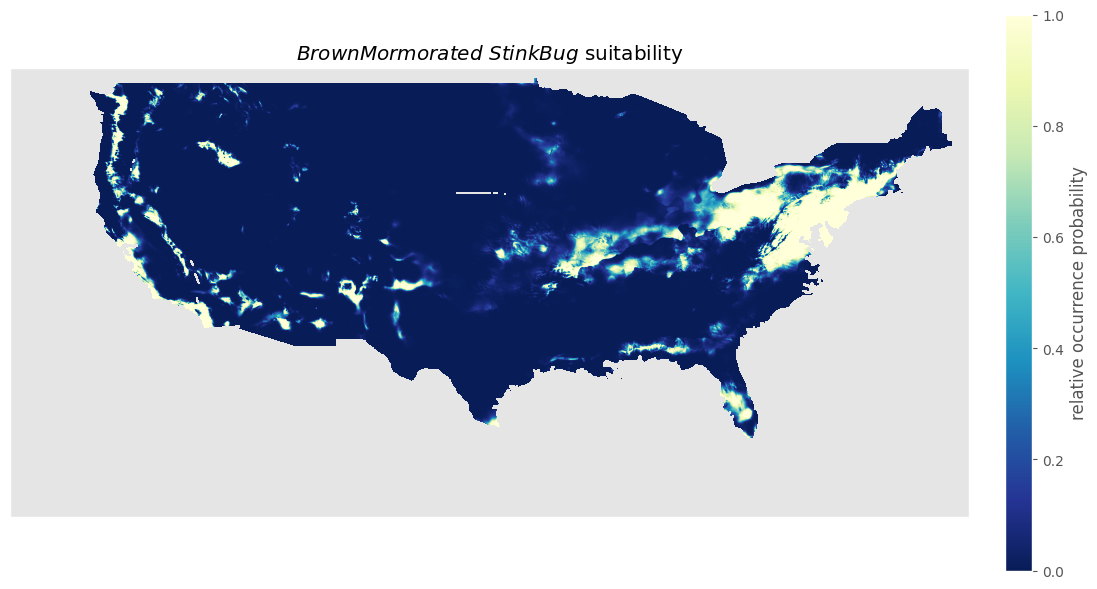

In [153]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot14 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar14 = plt.colorbar(plot14, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [154]:
# Save the colorbar as a TIFF file
colorbar_file14 = '//content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Precipitation_of_Driest_Month_Chelsa_Prediction_1981-2010.tif'
cbar14.ax.figure.savefig(colorbar_file14, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_15_Precipitation_of_Seasonality_Chelsa_1981-2010.tif

In [155]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[14], count=10_000)
background.head()

0    POINT (-112.02571 34.48230)
1     POINT (-99.12424 44.63173)
2    POINT (-112.19190 37.30515)
3    POINT (-113.83484 39.01476)
4    POINT (-106.95791 26.43630)
dtype: geometry

In [156]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [157]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [158]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [159]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.986


In [160]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model15c.ela')

# write the model predictions to disk
output_raster15 = 'Precipitation_of_Seasonality_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster15, quiet=True)

# Read into memory
with rio.open(output_raster15, 'r') as src:
    pred = src.read(1, masked=True)


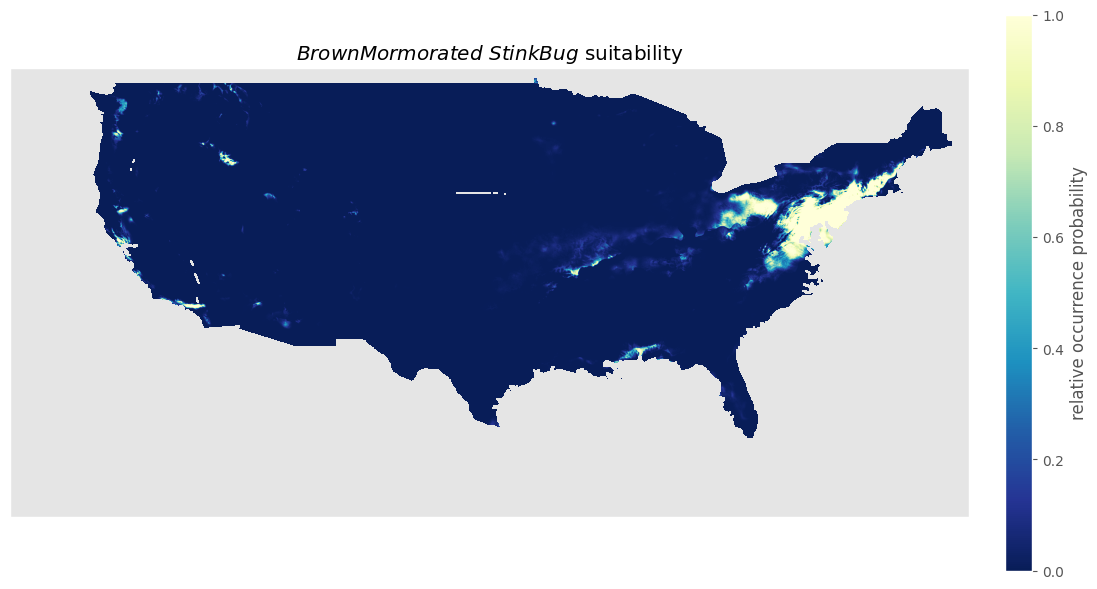

In [161]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot15 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar15 = plt.colorbar(plot15, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [162]:
# Save the colorbar as a TIFF file
colorbar_file15 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Precipitation_of_Seasonality_Chelsa_Prediction_1981-2010.tif'
cbar15.ax.figure.savefig(colorbar_file15, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_16_Precipitation_of_Wettest_Quarter_Chelsa_1981-2010.tif

In [163]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[15], count=10_000)
background.head()

0    POINT (-128.58750 37.68750)
1     POINT (-94.52917 20.42083)
2     POINT (-80.18750 23.87917)
3     POINT (-88.32917 26.43750)
4    POINT (-129.57917 27.21250)
dtype: geometry

In [164]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [165]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [166]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [167]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.984


In [168]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model16c.ela')

# Write the model predictions to disk
output_raster16 = 'Precipitation_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster16, quiet=True)

# Read into memory
with rio.open(output_raster16, 'r') as src:
    pred = src.read(1, masked=True)


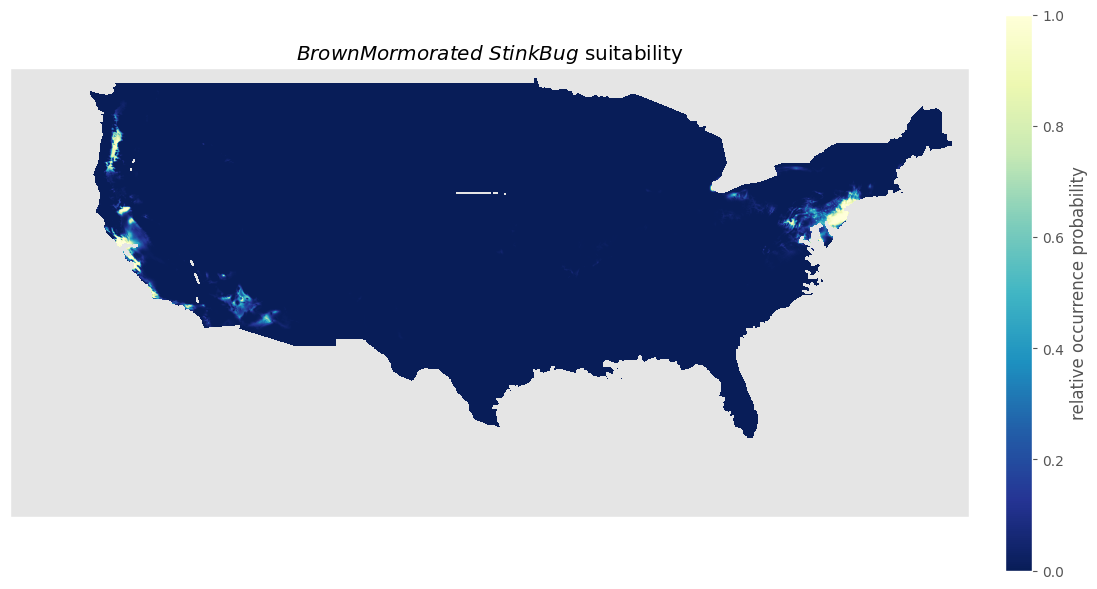

In [169]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot16 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar16 = plt.colorbar(plot16, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [170]:
# Save the colorbar as a TIFF file
colorbar_file16 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Precipitation_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif'

cbar16.ax.figure.savefig(colorbar_file16, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_17_Precipitation_of_Driest_Quarter_Chelsa_1981-2010.tif

In [171]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[16], count=10_000)
background.head()

0     POINT (-89.30417 21.68750)
1     POINT (-92.58750 36.10417)
2     POINT (-93.54583 24.05417)
3    POINT (-117.27083 34.83750)
4     POINT (-87.84583 39.21250)
dtype: geometry

In [172]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [173]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [174]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [175]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.986


In [176]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model17c.ela')

# Write the model predictions to disk
output_raster17 = 'Precipitation_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster17, quiet=True)

# Read into memory
with rio.open(output_raster17, 'r') as src:
    pred = src.read(1, masked=True)


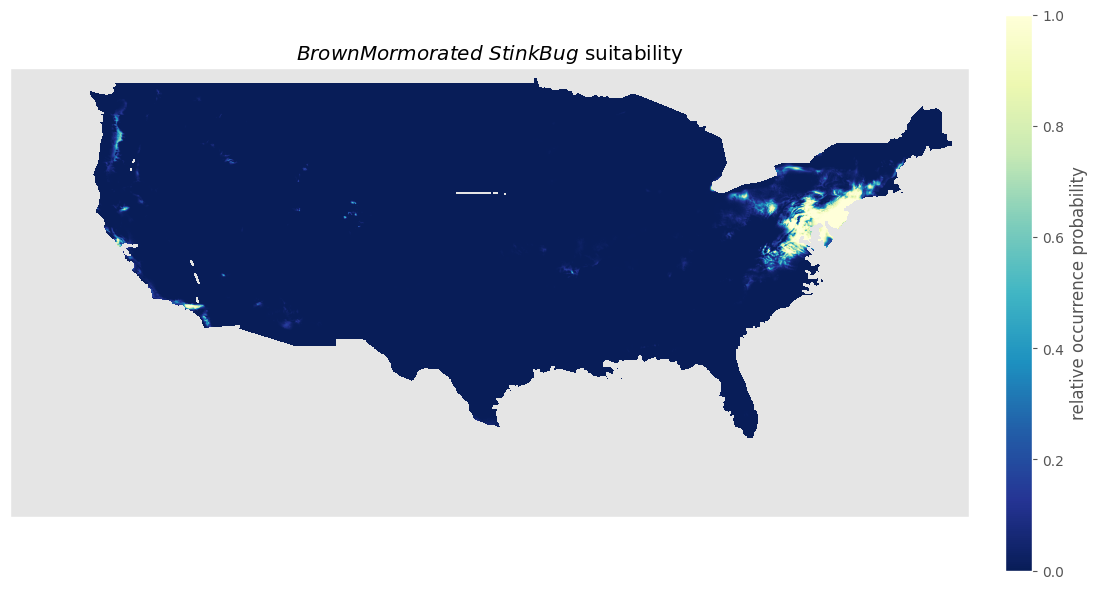

In [177]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot17 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar17 = plt.colorbar(plot17, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [178]:
# Save the colorbar as a TIFF file
colorbar_file17 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Precipitation_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar17.ax.figure.savefig(colorbar_file17, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_18_Precipitation_of_Warmest_Quarter_Chelsa_1981-2010.tif

In [179]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[17], count=10_000)
background.head()

0    POINT (-116.33750 46.80417)
1     POINT (-69.32083 44.47917)
2    POINT (-129.81250 21.82083)
3     POINT (-90.96250 49.03750)
4     POINT (-88.18750 23.58750)
dtype: geometry

In [180]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [181]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [182]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [183]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [184]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model18c.ela')

# Write the model predictions to disk
output_raster18 = 'Precipitation_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster18, quiet=True)

# Read into memory
with rio.open(output_raster18, 'r') as src:
    pred = src.read(1, masked=True)


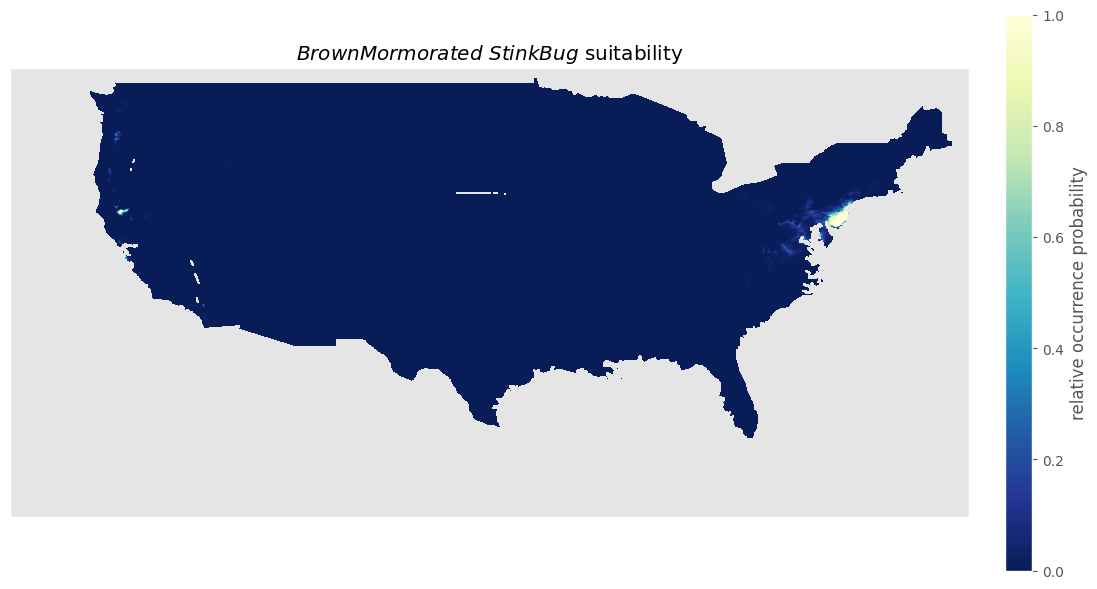

In [185]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot18 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar18 = plt.colorbar(plot18, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [186]:
# Save the colorbar as a TIFF file
colorbar_file18 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Precipitation_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar18.ax.figure.savefig(colorbar_file18, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_19_Precipitation_of_Coldest_Quarter_Chelsa_1981-2010.tif

In [187]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[18], count=10_000)
background.head()

0     POINT (-91.94583 33.27917)
1    POINT (-111.12917 43.42083)
2     POINT (-78.35417 27.36250)
3     POINT (-80.35417 37.65417)
4     POINT (-79.24583 26.67083)
dtype: geometry

In [188]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-86.91391 40.39347),1
1,POINT (-78.14250 39.30055),1
2,POINT (-83.08296 40.26885),1
3,POINT (-74.18713 40.84556),1
4,POINT (-83.01361 40.01215),1


In [189]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [190]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [191]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.986


In [192]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model19c.ela')

# Write the model predictions to disk
output_raster19 = 'Precipitation_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif'

#Applies a trained model to a list of raster datasets
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster19, quiet=True)

# Read into memory
with rio.open(output_raster19, 'r') as src:
    pred = src.read(1, masked=True)


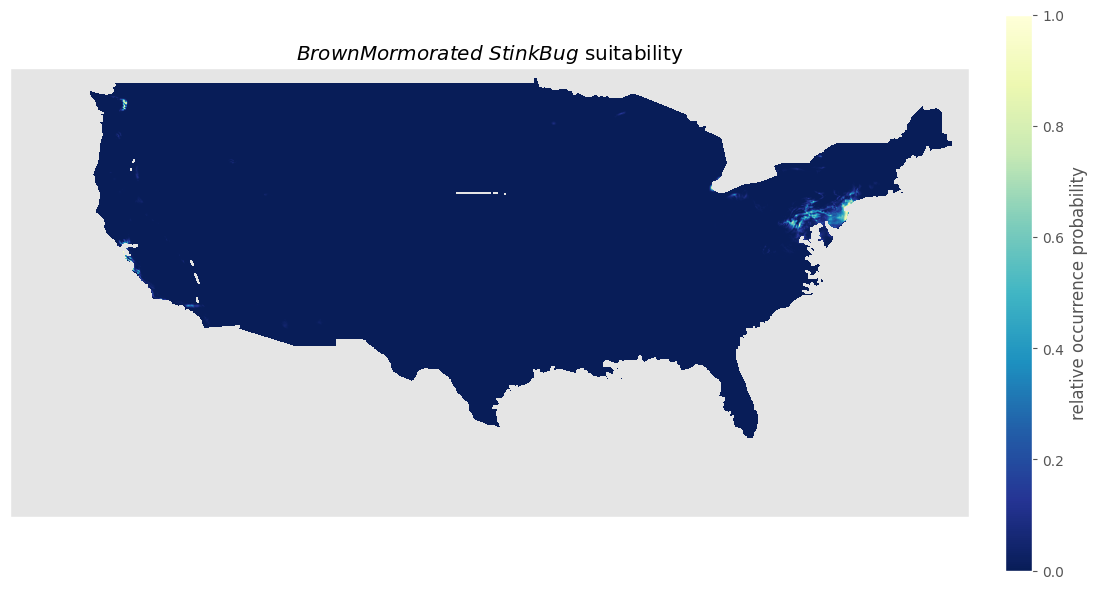

In [193]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot19 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('$Brown Mormorated\ Stink Bug$ suitability')
ax.set_xticks([])
ax.set_yticks([])
cbar19 = plt.colorbar(plot19, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [194]:
# Save the colorbar as a TIFF file
colorbar_file19 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_Pred_1981-2010/Precipitation_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar19.ax.figure.savefig(colorbar_file19, format='tiff')

# Close the figure to free up memory
plt.close(fig)